In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold,mutual_info_regression,SelectKBest,chi2
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import plotly
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_absolute_percentage_error,r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

### Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [ ]:
df=pd.read_csv('train.csv')
df.drop('Id',axis=1,inplace=True)
y='SalePrice'  #@param {type :"string"}

In [ ]:
percentage_of_values_in_column = 75 #@param {type:"integer"}
df2=df.dropna(thresh=len(df)*percentage_of_values_in_column/100,axis=1)

In [ ]:
df3=df2.dropna()
df4=df3.copy()
# Identify categorical features
categorical_features = df4.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical features
for feature in categorical_features:
    df4[feature] = label_encoder.fit_transform(df4[feature])

# Print the encoded dataframe
# print(df4)

In [ ]:
f_p_values=chi2(df4[categorical_features],df4[y]) # first value in f-score and second value is p
p_values=pd.Series(f_p_values[1])
p_values.index = df4[categorical_features].columns
less_p_value =p_values[p_values >= 0.05].index.to_list()
df5=df4.drop(less_p_value,axis=1)
threshold = 0.02 #@param {type:"number"}
df_vth=VarianceThreshold(threshold=threshold)
df_vth.fit(df5)
constant_columns = [col for col in df5.columns if col not in df5.columns[df_vth.get_support()]]
constant_columns=[col for col in constant_columns if df5[col].dtype != 'Object']
df6=df5.drop(constant_columns,axis=1)

In [ ]:
def correlation(df,threshold):
  col_corr = set()
  corr_matrix=df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
cor_f=correlation(df6.drop(y,axis=1),0.95)

In [ ]:
df7=df6.drop(cor_f,axis=1)

<Axes: >

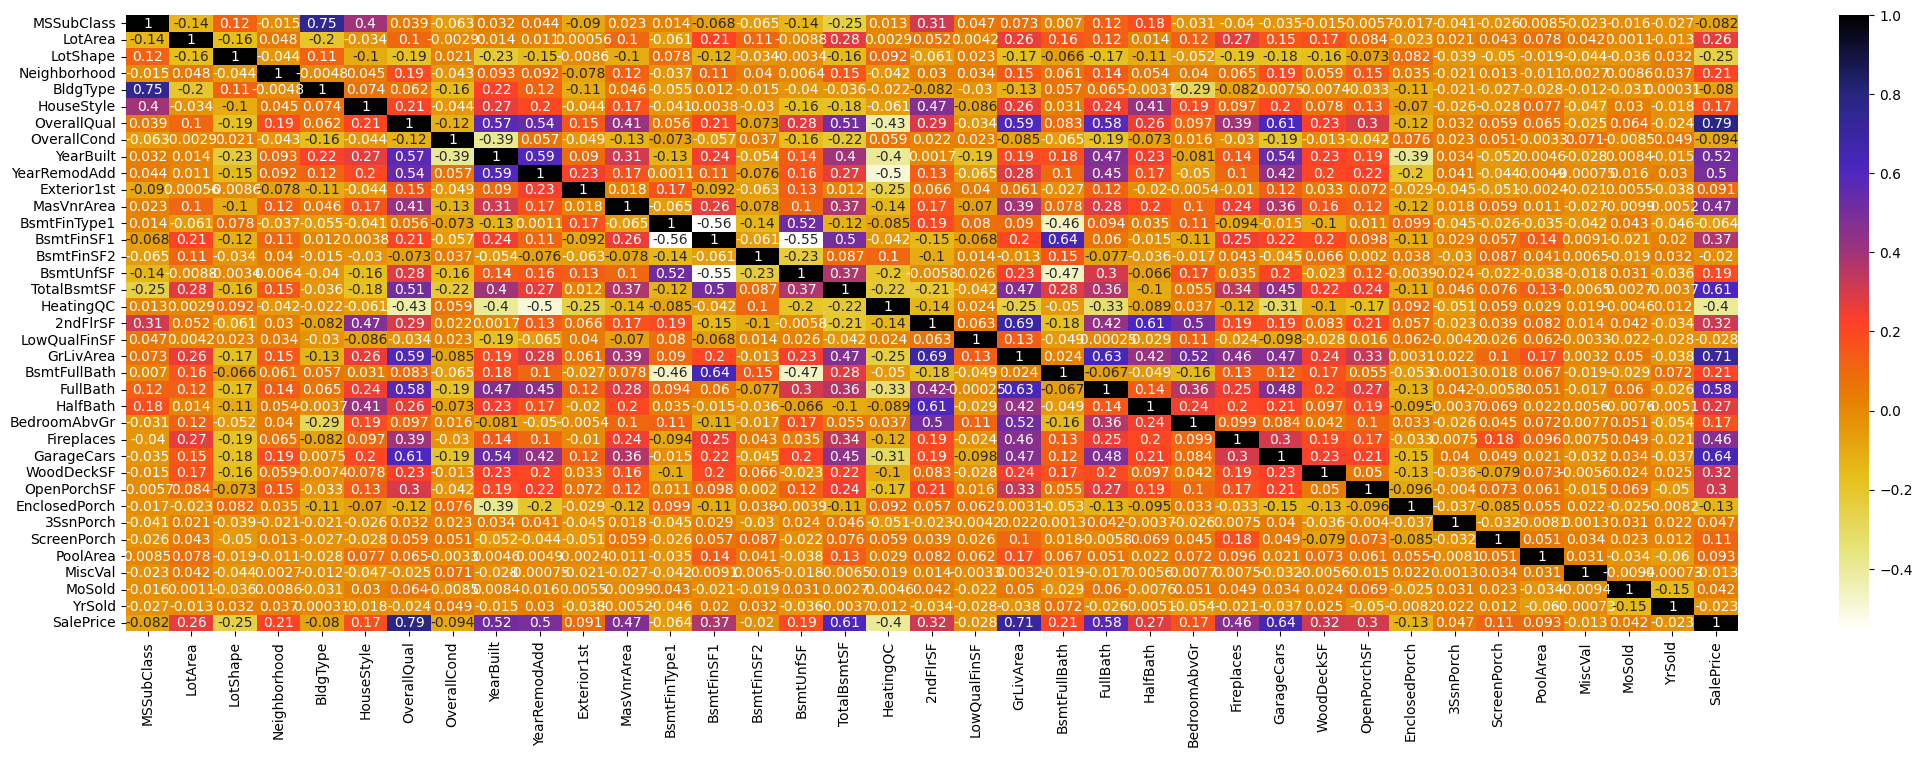

In [ ]:
plt.figure(figsize=(26,8))
sns.heatmap(df7.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [ ]:
X = df7.drop(y, axis=1)  # Features
y = df7[y]  # Target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


### Dimensionality reduction 47 columns to 14 columns by PCA

In [ ]:
df7.shape

(1094, 47)

### n_components :Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors.

In [ ]:
r2_list=[]
for i in range(1,df7.shape[1]):
  n_components = i #@param {type:"raw"}
  pca=PCA(n_components=n_components)
  X_train_pca=pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  model = LinearRegression()
  model.fit(X_train_pca, y_train)

    # Calculate predictions
  y_pred = model.predict(X_test_pca)

  # Calculate R2 score
  r2 = r2_score(y_test, y_pred)

  # Calculate MAE
  mae = mean_absolute_error(y_test, y_pred)

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  # Calculate MAPE
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  # Create a DataFrame to display the metrics
  metrics_df = pd.DataFrame({'R2 Score': [r2],
                            'MAE': [mae],
                            'RMSE': [rmse],
                            'MAPE': [mape]})
  print(f'FOR COMPONENT {i} METRICS ',metrics_df)
  r2_list.append(r2)


FOR COMPONENT 1 METRICS     R2 Score           MAE          RMSE      MAPE
0   0.08922  56043.461711  80797.510353  28.82612
FOR COMPONENT 2 METRICS     R2 Score          MAE          RMSE       MAPE
0  0.700913  31983.81671  46300.974045  16.666371
FOR COMPONENT 3 METRICS     R2 Score           MAE          RMSE       MAPE
0  0.702923  31843.436429  46145.129118  16.642348
FOR COMPONENT 4 METRICS     R2 Score          MAE          RMSE       MAPE
0  0.712249  31183.72798  45415.046838  16.297516
FOR COMPONENT 5 METRICS     R2 Score           MAE          RMSE       MAPE
0  0.711341  31064.872493  45486.659671  16.454052
FOR COMPONENT 6 METRICS     R2 Score           MAE          RMSE       MAPE
0  0.703641  30176.908424  46089.341354  15.917725
FOR COMPONENT 7 METRICS     R2 Score           MAE         RMSE       MAPE
0  0.706006  30144.431047  45905.04507  15.932622
FOR COMPONENT 8 METRICS     R2 Score           MAE          RMSE     MAPE
0  0.722557  29116.431202  44594.139517  15.5

In [ ]:
r2_list.index(max(r2_list))

14

In [ ]:
r2_list[14]

0.7315424070967305

### explained_variance_ratio: Percentage of variance explained by each of the selected components


### Explained_variance_ :The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.
### Equal to n_components largest eigenvalues of the covariance matrix of X.

In [ ]:
r2_list=[]
for i in range(1,df7.shape[1]):
  n_components = i #@param {type:"raw"}
  pca=PCA(n_components=n_components)
  X_train_pca=pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  model = LinearRegression()
  model.fit(X_train_pca, y_train)

    # Calculate predictions
  y_pred = model.predict(X_test_pca)

  # Calculate R2 score
  r2 = r2_score(y_test, y_pred)

  # Calculate MAE
  mae = mean_absolute_error(y_test, y_pred)

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  # Calculate MAPE
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  # Create a DataFrame to display the metrics
  metrics_df = pd.DataFrame({'R2 Score': [r2],
                            'MAE': [mae],
                            'RMSE': [rmse],
                            'MAPE': [mape]})
  print(f'FOR COMPONENT {i} METRICS ',metrics_df)
  r2_list.append(r2)

LinearRegression()

In [ ]:
find_tol=[]
r2_list=[]
r1=70
for tol in range(1,1000,2):
  n_components = 14 #@param {type:"raw"}
  pca=PCA(n_components=n_components,svd_solver='auto',iterated_power=tol,n_oversamples=10) # This parameter is only relevant when svd_solver="randomized".
  X_train_pca=pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  model = LinearRegression()
  model.fit(X_train_pca, y_train)

    # Calculate predictions
  y_pred = model.predict(X_test_pca)

  # Calculate R2 score
  r2 = r2_score(y_test, y_pred)
  if r2 > r1:
    find_tol.append(tol)
    r2_list.append(r2)


  r1=r2

  # Calculate MAE
  mae = mean_absolute_error(y_test, y_pred)

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  # Calculate MAPE
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  # Create a DataFrame to display the metrics
  metrics_df = pd.DataFrame({'R2 Score': [r2],
                            'MAE': [mae],
                            'RMSE': [rmse],
                            'MAPE': [mape]})

In [ ]:
metrics_df

,R2 Score,MAE,RMSE,MAPE
0,0.730692,28265.949288,43935.518552,15.098877


In [ ]:
pca.explained_variance_ratio_

array([9.83252643e-01, 6.30331361e-03, 4.52655602e-03, 3.82756186e-03,
       4.96640312e-04, 3.54723102e-04, 3.05773358e-04, 2.69453056e-04,
       2.58754157e-04, 1.67543987e-04, 5.92989099e-05, 4.19608364e-05,
       3.92075045e-05, 3.48376650e-05])

In [ ]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
X_train_pca_normalized = scaler.fit_transform(X_train_pca)


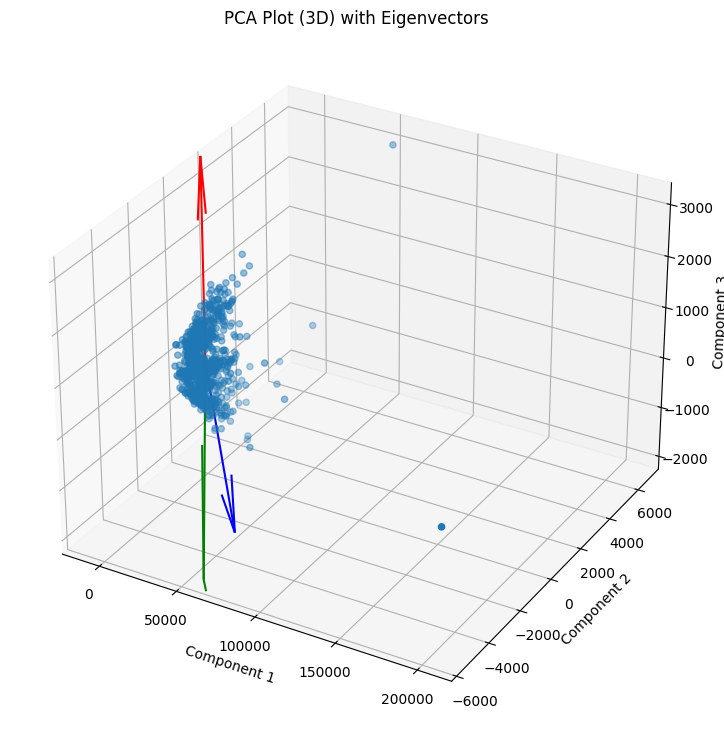

In [ ]:


# Get the eigenvectors
eigenvectors = pca.components_

# Create a 3D plot
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, projection='3d')

# Plot the components in 3D
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2])

# Plot the eigenvectors
origin = [0, 0, 0]

ax.quiver(*origin, *eigenvectors[0][:3]*4000, color='r')

ax.quiver(*origin, *eigenvectors[1][:3]*122222, color='blue')

ax.quiver(*origin, *eigenvectors[2][0:3]*1222222, color='g')
# Set labels for each axis
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Set the title of the plot
ax.set_title('PCA Plot (3D) with Eigenvectors')

# Show the plot
plt.show()


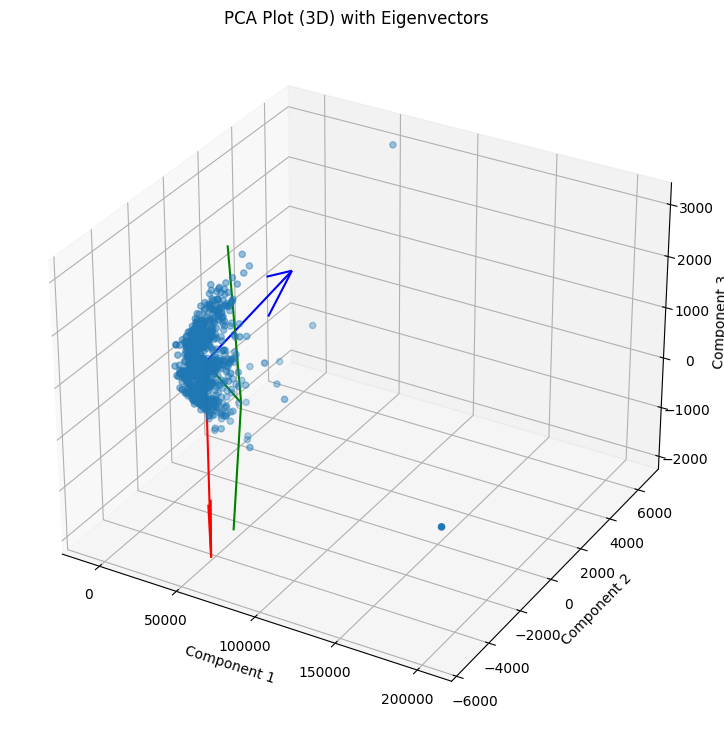

In [ ]:


# Get the eigenvectors
eigenvectors = pca.components_.T

# Create a 3D plot
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, projection='3d')

# Plot the components in 3D
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2])

# Plot the eigenvectors
origin = [0, 0, 0]

ax.quiver(*origin, *eigenvectors[0][:3]*250000, color='r')

ax.quiver(*origin, *eigenvectors[1][:3]*422222, color='blue')

ax.quiver(*origin, *eigenvectors[2][:3]*36500, color='g')
# Set labels for each axis
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Set the title of the plot
ax.set_title('PCA Plot (3D) with Eigenvectors')

# Show the plot
plt.show()


## MODEL ON RAW DATA

In [ ]:
X = df4.drop('SalePrice', axis=1)  # Features
y = df4['SalePrice']  # Target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate predictions
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({'R2 Score': [r2],
                           'MAE': [mae],
                           'RMSE': [rmse],
                           'MAPE': [mape]})

# # Display the metrics table
# print(metrics_df)


In [ ]:
metrics_df

,R2 Score,MAE,RMSE,MAPE
0,0.858975,18212.907,26139.622795,10.935543
